### argmax

- 제일 큰 아이의 index를 반환

### Tensorflow에서 MNIST 읽기

- 각 픽셀이 255값이 최댓값이어서 0~1사이의 값으로 조정 (일종의 min max scaler)

In [1]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_trian, x_test = x_train / 255.0, x_test / 255.0  

2024-02-26 16:38:26.204076: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 16:38:26.236625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 16:38:26.236835: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 16:38:26.238779: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 16:38:26.245835: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2024-02-26 16:38:29.419034: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 16:38:29.467823: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 16:38:29.468547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
import time 

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test),
                 epochs = 10, batch_size = 100, verbose = 1 )

print('Fit time :', time.time() - start_time)

Epoch 1/10


2024-02-26 16:38:39.840281: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0c5f2ae8a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-26 16:38:39.840342: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-26 16:38:39.850563: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-26 16:38:39.882417: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708933120.042232    8216 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 [==============================] - 7s 8ms/step - loss: 4.0823 - accuracy: 0.9180 - val_loss: 1.9951 - val_accuracy: 0.9458
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.4379 - accuracy: 0.9606 - val_loss: 2.0553 - val_accuracy: 0.9505
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2780 - accuracy: 0.9684 - val_loss: 2.0576 - val_accuracy: 0.9314
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2359 - accuracy: 0.9715 - val_loss: 2.0690 - val_accuracy: 0.9013
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2465 - accuracy: 0.9701 - val_loss: 2.0548 - val_accuracy: 0.8651
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2337 - accuracy: 0.9723 - val_loss: 2.0304 - val_accuracy: 0.7776
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2410 - accuracy: 0.9717 - val_loss: 2.0377 - val_accuracy: 0.5891
Epoch 8/10
600/60

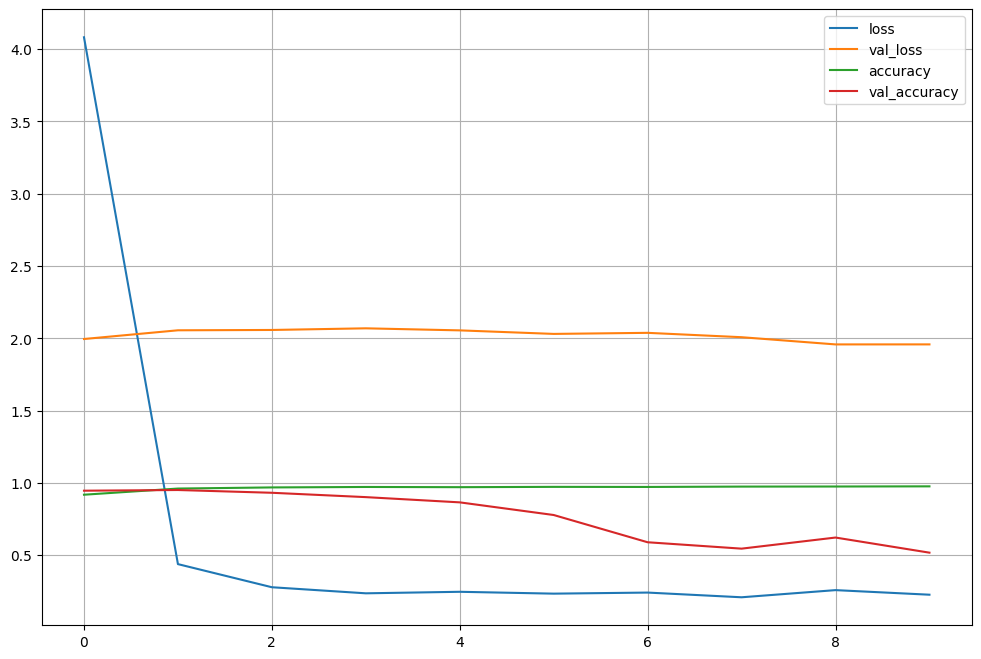

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize = (12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()

plt.show()

In [8]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.9578 - accuracy: 0.5171
Test loss : 1.9578322172164917
Test accuracy : 0.5170999765396118


In [9]:
import numpy as np 

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]


313/313 [==============================] - 1s 1ms/step


array([7, 8, 8, 8, 4, 8, 8, 9, 8, 9])

In [10]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [11]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

4829

In [12]:
import random

samples = random.choices(population = wrong_result, k = 16)
samples

[7366,
 2039,
 3597,
 1354,
 771,
 1078,
 7937,
 4701,
 9510,
 2449,
 3553,
 6,
 1263,
 153,
 890,
 6959]

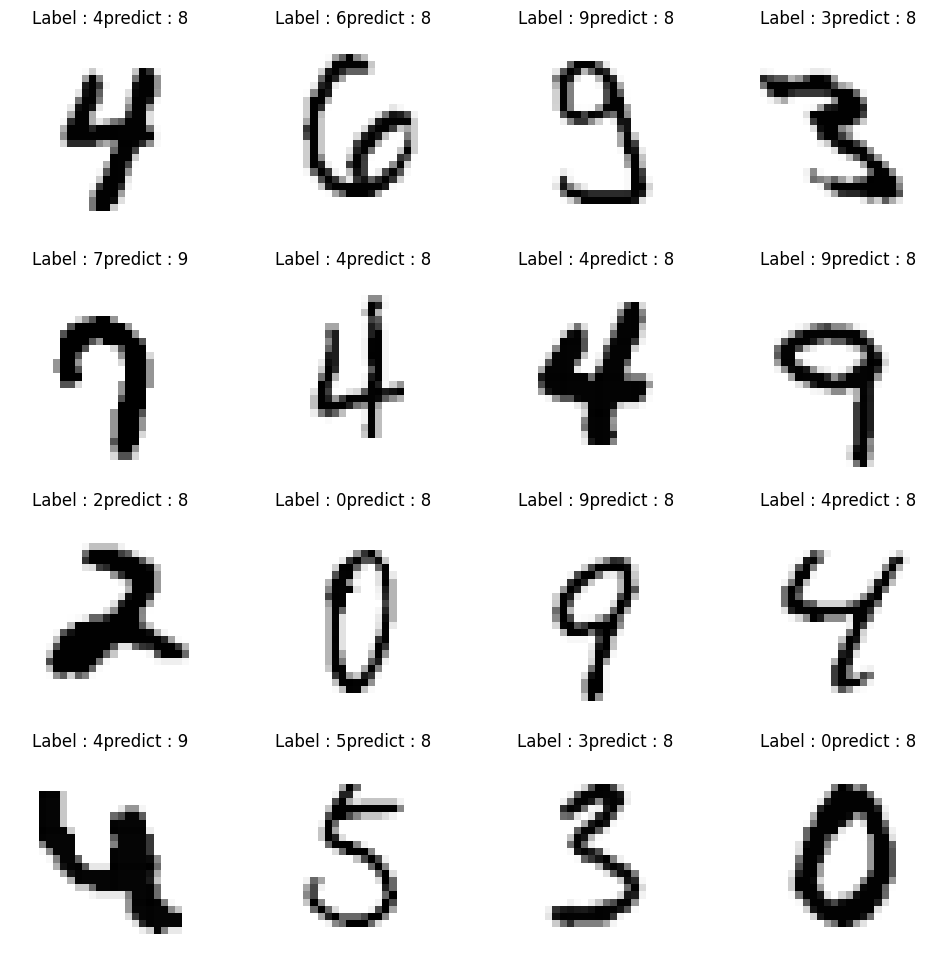

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize = (12, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'predict : ' + str(predicted_labels[n]))
    plt.axis('off')


plt.show()